# Configuração e Carregamento dos Dados

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
# Configurações visuais
sns.set_theme(style="whitegrid") # Fundo branco com grades para facilitar leitura
plt.rcParams["figure.figsize"] = (14, 7) # Gráficos grandes e largos

# Caminho dos arquivos
base_path = "../data/raw/"

# 1. Carregar os datasets
print("Carregando arquivos...")
df_inad = pd.read_csv(f"{base_path}df_inadimplencia.csv")
df_econ = pd.read_csv(f"{base_path}df_economico.csv")
df_ibge = pd.read_csv(f"{base_path}df_ibge.csv")
df_clima = pd.read_csv(f"{base_path}df_inmet.csv")
df_eventos = pd.read_csv(f"{base_path}df_eventos_politicos.csv")

# 2. Padronizar a coluna 'data' para datetime (Obrigatório para Time Series)
dfs = [df_inad, df_econ, df_ibge, df_clima, df_eventos]

for df in dfs:
    # Converte string 'MM/YYYY' para objeto datetime (sempre dia 1 do mês)
    df["data"] = pd.to_datetime(df["data"], format="%m/%Y")

print("Arquivos carregados e datas convertidas com sucesso!")

Carregando arquivos...
Arquivos carregados e datas convertidas com sucesso!


# Merge

In [3]:
# Unificar todos os dataframes usando a coluna 'data' como chave
# O 'outer' garante que não perderemos meses se algum dataset tiver datas a mais que outro
df_mestre = reduce(
    lambda left, right: pd.merge(left, right, on="data", how="outer"),
    dfs
)

# Ordenar cronologicamente
df_mestre = df_mestre.sort_values("data").reset_index(drop=True)

# Definir a data como índice para facilitar os plots de série temporal
df_mestre.set_index("data", inplace=True)

# Filtro de sanidade: Vamos olhar dados a partir de 2015 (onde começam suas coletas consistentes)
df_mestre = df_mestre[df_mestre.index >= "2015-01-01"]

print(f"Dataset Mestre montado! Dimensões: {df_mestre.shape}")
# Mostra as 5 primeiras linhas para conferência
display(df_mestre.head())

Dataset Mestre montado! Dimensões: (132, 38)


,inad_pj_tot,inad_pf_tot,inad_rd_pf_cr_rur_tot,inad_rd_pj_cr_rur_tot,ipca,spread_pf,spread_pj,spread_tot,icms_petroleo,soja_triturada_expt,...,temp_min_media_c,umidade_media_pct,vento_vel_max_ms,vento_vel_media_ms,flag_pandemia,flag_greve_caminhoneiros,flag_eleicao_presidencial,flag_joesley_day,flag_impeachment,presidente
data,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1.98,3.75,1.36,0.66,2.50,22.39,8.70,15.68,5556575.0,3.510272e+07,...,21.12,70.55,4.68,1.74,0.0,0.0,0.0,0.0,0.0,Dilma
2015-02-01,1.99,3.81,1.53,0.71,2.37,23.23,9.05,16.28,5494786.0,3.461604e+08,...,21.05,76.14,4.65,1.68,0.0,0.0,0.0,0.0,0.0,Dilma
2015-03-01,2.06,3.67,1.55,0.72,3.36,22.91,8.85,16.03,5076328.0,2.211790e+09,...,20.81,78.16,4.16,1.48,0.0,0.0,0.0,0.0,0.0,Dilma
2015-04-01,2.24,3.75,1.52,0.71,0.78,23.85,9.27,16.75,5880802.0,2.534258e+09,...,20.24,77.95,4.11,1.42,0.0,0.0,0.0,0.0,0.0,Dilma
2015-05-01,2.27,3.86,1.51,0.79,1.22,24.42,9.26,17.05,5512832.0,3.612717e+09,...,18.98,78.24,4.38,1.55,0.0,0.0,0.0,0.0,0.0,Dilma


In [4]:
df_mestre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2015-01-01 to 2025-12-01
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   inad_pj_tot                         120 non-null    float64
 1   inad_pf_tot                         120 non-null    float64
 2   inad_rd_pf_cr_rur_tot               120 non-null    float64
 3   inad_rd_pj_cr_rur_tot               120 non-null    float64
 4   ipca                                120 non-null    float64
 5   spread_pf                           120 non-null    float64
 6   spread_pj                           120 non-null    float64
 7   spread_tot                          120 non-null    float64
 8   icms_petroleo                       52 non-null     float64
 9   soja_triturada_expt                 56 non-null     float64
 10  soja_residuo_expt                   56 non-null     float64
 11  soja_oleo_expt            

In [5]:
df_mestre.isnull().sum().sort_values(ascending=False)

icms_petroleo                         80
soja_triturada_expt                   76
soja_residuo_expt                     76
soja_oleo_expt                        76
milho_grao_expt                       76
rendimento_medio_mensal_reais         23
tx_informalidade_p14m_ocupadas_pct    14
ipca                                  12
spread_pf                             12
inad_rd_pf_cr_rur_tot                 12
inad_pf_tot                           12
inad_pj_tot                           12
inad_rd_pj_cr_rur_tot                 12
spread_tot                            12
selic                                 12
spread_pj                             12
dolar_ptax                            12
cdi                                   12
flag_impeachment                      12
presidente                            12
flag_joesley_day                      12
flag_eleicao_presidencial             12
flag_pandemia                         12
flag_greve_caminhoneiros              12
p14m_forca_traba

# Análise Visual da Tendência (Target)

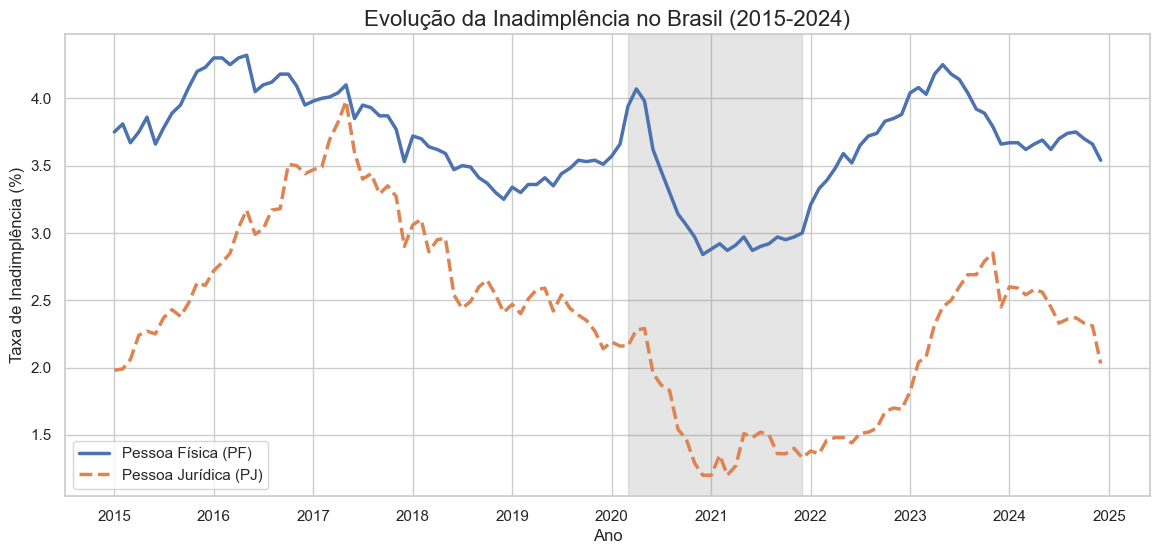

In [6]:
# Plot da Inadimplência PF vs PJ
plt.figure(figsize=(14, 6))

# Linha PF
sns.lineplot(data=df_mestre, x=df_mestre.index, y="inad_pf_tot", label="Pessoa Física (PF)", linewidth=2.5)
# Linha PJ
sns.lineplot(data=df_mestre, x=df_mestre.index, y="inad_pj_tot", label="Pessoa Jurídica (PJ)", linewidth=2.5, linestyle="--")

plt.title("Evolução da Inadimplência no Brasil (2015-2024)", fontsize=16)
plt.ylabel("Taxa de Inadimplência (%)")
plt.xlabel("Ano")
plt.legend()

# Adicionando destaque para a Pandemia (sombreado cinza)
plt.axvspan('2020-03-01', '2021-12-01', color='gray', alpha=0.2, label='Pandemia (Impacto)')

plt.show()

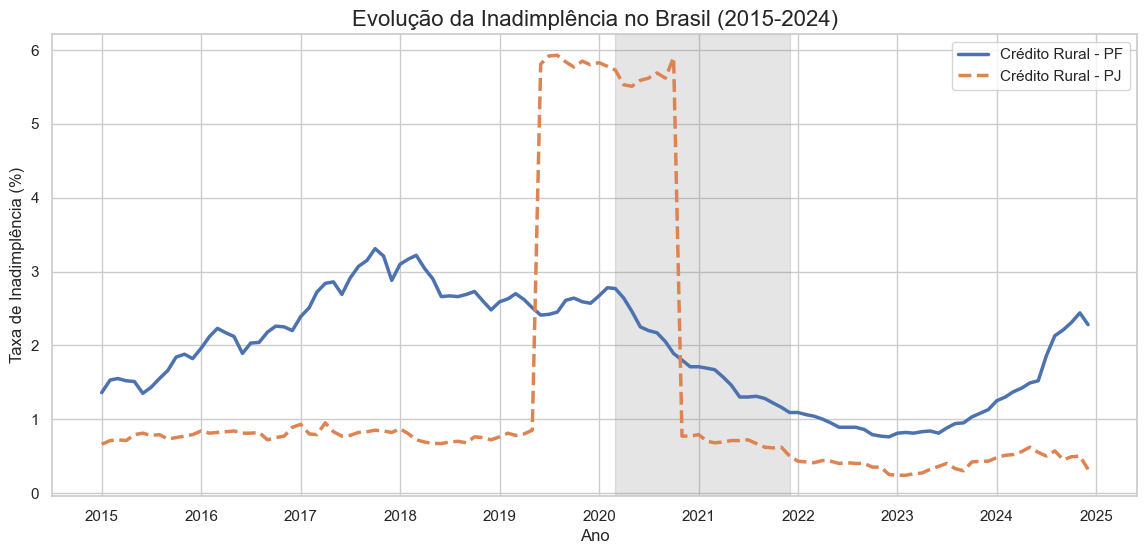

In [7]:
# Plot da Inadimplência Crédito Rural PF vs PJ
plt.figure(figsize=(14, 6))

# Linha CR-PF
sns.lineplot(data=df_mestre, x=df_mestre.index, y="inad_rd_pf_cr_rur_tot", label="Crédito Rural - PF", linewidth=2.5)
# Linha CR-PJ
sns.lineplot(data=df_mestre, x=df_mestre.index, y="inad_rd_pj_cr_rur_tot", label="Crédito Rural - PJ", linewidth=2.5, linestyle="--")

plt.title("Evolução da Inadimplência no Brasil (2015-2024)", fontsize=16)
plt.ylabel("Taxa de Inadimplência (%)")
plt.xlabel("Ano")
plt.legend()

# Adicionando destaque para a Pandemia (sombreado cinza)
plt.axvspan('2020-03-01', '2021-12-01', color='gray', alpha=0.2, label='Pandemia (Impacto)')

plt.show()

# Mapa de Calor de Correlações

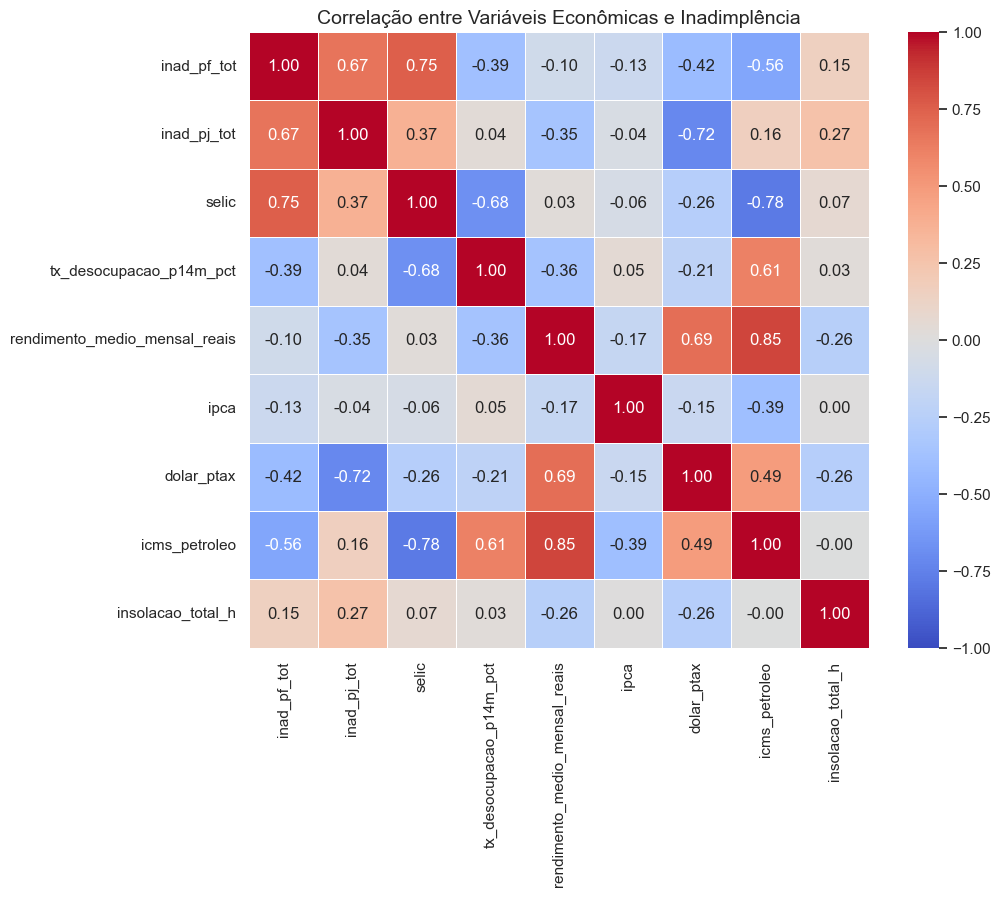

In [9]:
# Selecionando as variáveis mais importantes para não poluir o gráfico
cols_analise = [
    "inad_pf_tot",                  # Alvo 1
    "inad_pj_tot",                  # Alvo 2
    "selic",                        # Juros
    "tx_desocupacao_p14m_pct",      # Desemprego
    "rendimento_medio_mensal_reais",# Renda
    "ipca",                         # Inflação
    "dolar_ptax",                   # Dólar
    "icms_petroleo",                # Atividade Econômica
    "insolacao_total_h"             # Clima (teste de hipótese)
]

# Calculando a correlação
corr = df_mestre[cols_analise].corr()

# Plotando o Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Variáveis Econômicas e Inadimplência", fontsize=14)
plt.show()

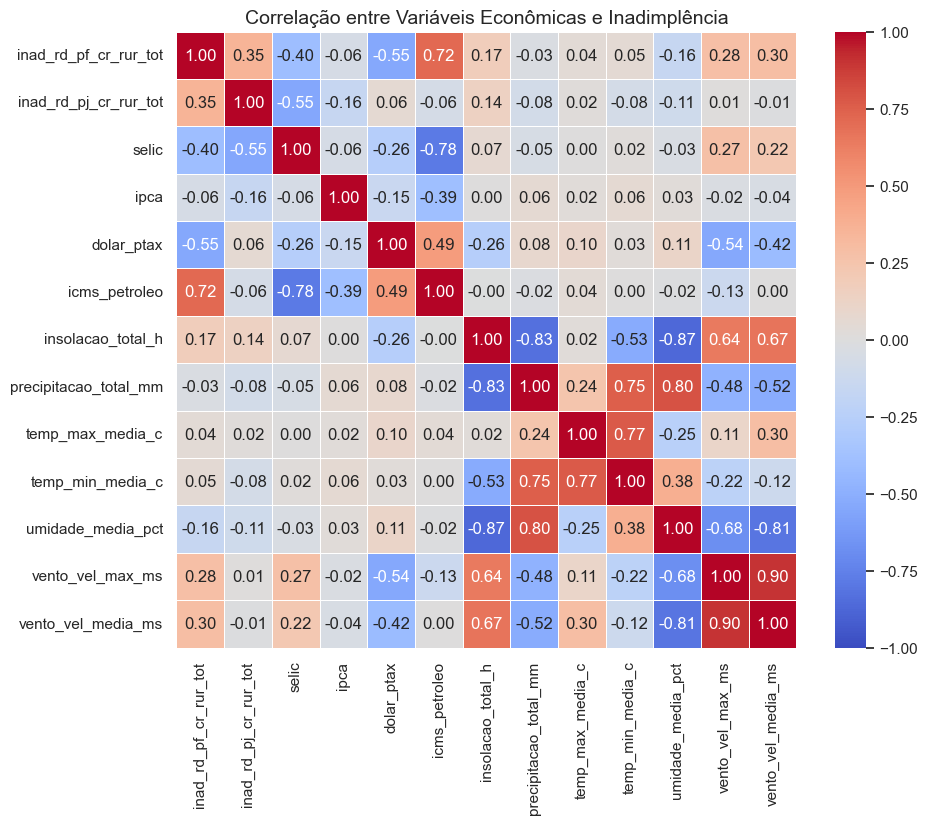

In [11]:
# Selecionando as variáveis mais importantes para não poluir o gráfico
cols_analise = [
    "inad_rd_pf_cr_rur_tot",        # Alvo 1    
    "inad_rd_pj_cr_rur_tot",        # Alvo 2
    "selic",                        # Juros
    "ipca",                         # Inflação
    "dolar_ptax",                   # Dólar
    "icms_petroleo",                # Atividade Econômica
    "insolacao_total_h",            # Clima (teste de hipótese)
    "precipitacao_total_mm",
    "temp_max_media_c",
    "temp_min_media_c",
    "umidade_media_pct",
    "vento_vel_max_ms",
    "vento_vel_media_ms"
]

# Calculando a correlação
corr = df_mestre[cols_analise].corr()

# Plotando o Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Variáveis Econômicas e Inadimplência", fontsize=14)
plt.show()

# Impacto Político (Boxplot)

C:\Users\pedro\AppData\Local\Temp\ipykernel_19128\3031387473.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_reset, x="presidente", y="inad_pf_tot", order=ordem_pres, palette="Set2")


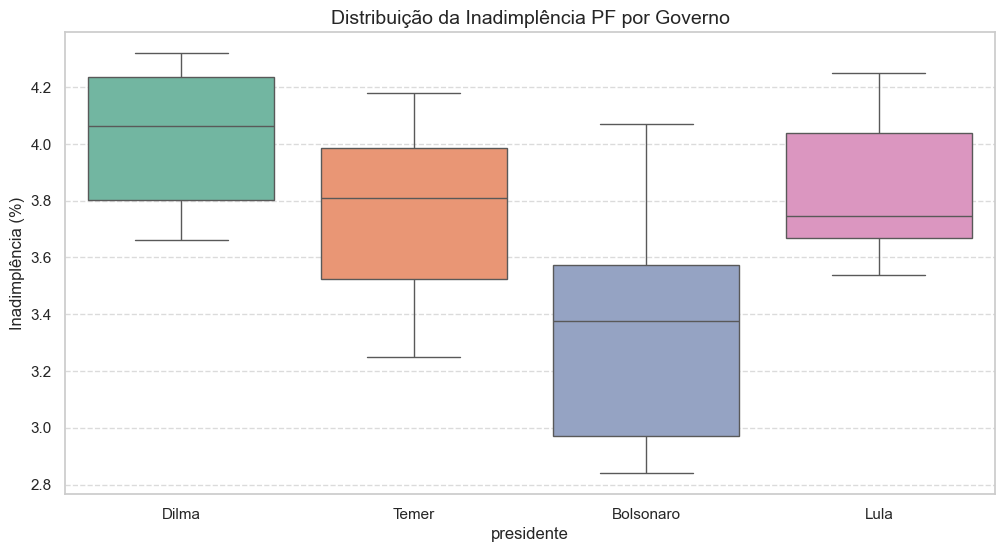

In [12]:
# Resetar índice para usar a coluna 'presidente' que criamos
df_reset = df_mestre.reset_index()

# Remover linhas onde 'presidente' é nulo (caso existam datas fora do mapeamento)
df_reset = df_reset.dropna(subset=['presidente'])

plt.figure(figsize=(12, 6))

# Definindo ordem cronológica para o gráfico
ordem_pres = ["Dilma", "Temer", "Bolsonaro", "Lula"]

sns.boxplot(data=df_reset, x="presidente", y="inad_pf_tot", order=ordem_pres, palette="Set2")
plt.title("Distribuição da Inadimplência PF por Governo", fontsize=14)
plt.ylabel("Inadimplência (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()